In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Chapter 1
# A First Numerical Problem

### 1.1 Radioactive Decay

Uranium-235, $^{235}\text{U}$, has some probability of decaying into two smaller nuclei. This isotope has a mean lifetime of $1\times10^9$ years. Let $N_U(t)$ be the number of uranium nuclei in a sample for a given time $t$. Then the bahavior is goverened by

$$\frac{dN_U}{dt}=-\frac{N_U}{\tau},$$

where $\tau$ is the time constant for decay. By direct substitution, the solution to this equation is

$$N_U = N_U(0) e^{-t/\tau},$$

where $N_U(0)$ is the number of nucleri at time $t=0$. Note that at time $t=\tau$ a fraction $e^{-1}$ of the nuclei have decayed. $\tau$ is also the mean lifetime of a nucleus.

### 1.2 A Numerical Approach

We want to be able to estimate the value of $N_U$ at later times given a value at time $t$ (usually $t=0$). This is called an initial value problem. The solution to these types of problems are based on the Taylor Expansion for $N_U$,

$$N_U(\Delta t) = N_U(0) + \frac{dN_U}{dt}\Delta t + \frac{1}{2}\frac{d^2N_U}{dt^2}(\Delta t)^2 + \text{  }...\text{ }$$

If we assume $\Delta t$ is small, then we can ignore terms that are second order and higher, leaving

$$N_U(\Delta t) \approx N_U(0) + \frac{dN_U}{dt}\Delta t$$

The same result can be obtained from the definition of a derivative.

$$\frac{dN_U}{dt} \equiv \lim_{\Delta t \to 0}\frac{N_U(t+\Delta t)-N_U(t)}{\Delta t} \approx \frac{N_U(t+\Delta t)-N_U(t)}{\Delta t}$$

$$ N_U(t+\Delta t) \approx N_U(t) + \frac{dN_U}{dt}\Delta t$$

The derivative of $N_U$ was given in section 1.1, so we can intsert it into the above equation leaving us with

$$N_U(t+\Delta t) \approx N_U(t) - \frac{N_U(t)}{\tau}\Delta t.$$

This approach is known as the *Euler Method*.

### 1.3 Design and Construction of a Working Program: Codes and Pseudocodes
#### Examples 1.1 - 1.3

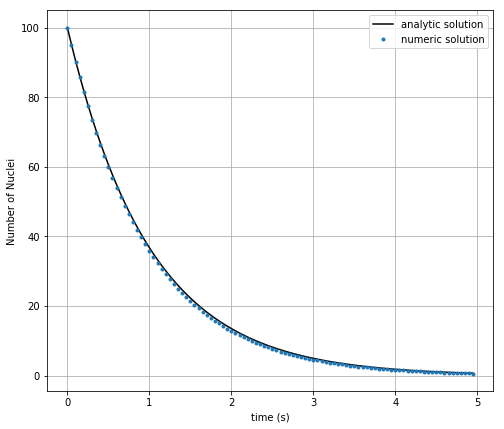

In [23]:
# Initialize vectors for number of Uranium nuclei and time
npoints = 100
n_uranium = np.zeros(npoints)
t = np.zeros(npoints)

# Set initial values
t[0] = 0    # duh
n_uranium[0] = 100
tau = 1    # seconds
dt = 5e-2  # seconds

# Perform Euler loop
for i in range(npoints-1):    # i ranges from 0 to npoints-2
    n_uranium[i+1] = n_uranium[i] - (n_uranium[i]/tau)*dt
    t[i+1] = t[i] + dt    # this step is trivial and can be computed outside of the loop (i.e. t = np.arange(0, 100*dt, dt))
# note that i can be in range(1, npoints) and the loop would compute n_uranium[i] = n_uranium[i-1] - ...

# Compute analytical solution for comparison
n_uranium_analytic = n_uranium[0] * np.exp(-1*t/tau)

# Plot decay
fig = plt.figure(figsize=(8,7))
plt.plot(t, n_uranium_analytic, 'k-', label='analytic solution')
plt.plot(t, n_uranium, '.', label='numeric solution')
plt.xlabel('time (s)')
plt.ylabel('Number of Nuclei')
plt.legend()    # I guess legend has to come before show
plt.grid()
plt.show()

### 1.5 Numerical Considerations

Since we ignored the terms that were second order and higher in the Taylor Expansion, we introduced error into our solution. There's also something called *roundoff error* when using finite precision numbers, but this shouldn't really be a problem here. Some problems however are inherently sensitive to roundoff errors where it will have a more noticeable effect.

The Euler method employed turned a differential equation into a difference equation, in other words we went from a continuous time problem to a discrete time problem.
1. How do we know that the errors introduced by this discreteness are negligable
2. How do we choose the value of a time step for a calculation?

No general rule exists, but experiments should be repeated for multiple values of $\Delta t$. With smaller time steps, the solution converges to the exact solution more quickly, as seen in the plot below. This makes since the error is proportional to $\Delta t$. This can be seen by noting that the terms dropped in the approximation were of order $(\Delta t)^2$. It takes $t/\Delta t$ steps to reach the value of the solution at a specific $t$, so the total error is proportional to the product of the number of time steps ($t/\Delta t$) and the error per step (~$\Delta t$). Therefore, the difference between the Euler result and the exact result at a time step is proportional to $\Delta t$. A good rule of thumb is to pick a time step that is smaller than any characteristic time scale in the problem (e.g. $\tau$).

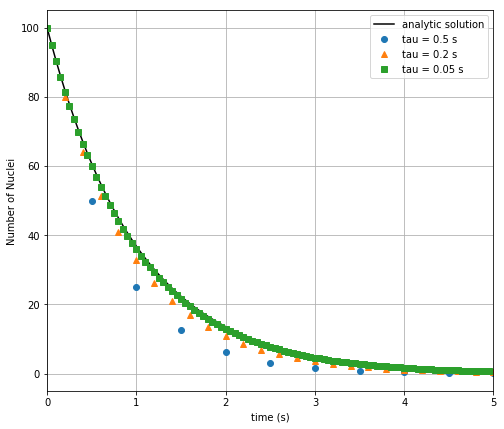

In [22]:
# Initialize vectors for number of Uranium nuclei and time
npoints = 100
n_uranium = np.zeros([3,npoints])
t = np.zeros([3,npoints])


# Set initial values
t[:,0] = 0
n_uranium[:,0] = 100
tau = 1    # seconds
dt = np.array([0.5, 0.2, 0.05])  # seconds

for n in range(dt.size):

    # Perform Euler loop
    for i in range(npoints-1):    # i ranges from 0 to npoints-2
        n_uranium[n,i+1] = n_uranium[n,i] - (n_uranium[n,i]/tau)*dt[n]
        t[n,i+1] = t[n,i] + dt[n]    # this step is trivial and can be computed outside of the loop (i.e. t = np.arange(0, 100*dt, dt))
    # note that i can be in range(1, npoints) and the loop would compute n_uranium[i] = n_uranium[i-1] - ...

# Compute analytical solution for comparison
n_uranium_analytic = n_uranium[0,0] * np.exp(-1*t[2,:]/tau)

# Plot decay
fig = plt.figure(figsize=(8,7))
plt.plot(t[2,:], n_uranium_analytic, 'k-', label='analytic solution')
plt.plot(t[0], n_uranium[0], 'o', label='tau = 0.5 s')
plt.plot(t[1], n_uranium[1], '^', label='tau = 0.2 s')
plt.plot(t[2], n_uranium[2], 's', label='tau = 0.05 s')

plt.xlabel('time (s)')
plt.ylabel('Number of Nuclei')
axes = plt.gca()
axes.set_xlim([0,5])
plt.grid()
plt.legend()
plt.show()